In [181]:
#Import library
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [182]:
#Import data to csv
data  = {
    "Year": [2013, 2014, 2015, 2016, 2017, 2019, 2020, 2021, 2022, 2023],
    "Accidents": [4322, 4840, None, None, 3531, 4141, 3176, 2670, 2976, 3317],
    "Deaths": [1901, 2148, 2265, 1717, 1780, 2151, 1646, 1497, 1709, 1590],
    "Injuries": [7208, 8057, 8000, 6607, 5539, 11368, 6141, 3615, 4026, 4515]
}

df = pd.DataFrame(data)
df

,Year,Accidents,Deaths,Injuries
0,2013,4322.0,1901,7208
1,2014,4840.0,2148,8057
2,2015,NaN,2265,8000
3,2016,NaN,1717,6607
4,2017,3531.0,1780,5539
5,2019,4141.0,2151,11368
6,2020,3176.0,1646,6141
7,2021,2670.0,1497,3615
8,2022,2976.0,1709,4026
9,2023,3317.0,1590,4515


In [183]:
#Fill missing value with linear interpolation

df["Accidents"] = df["Accidents"].interpolate(method="linear")
df

,Year,Accidents,Deaths,Injuries
0,2013,4322.000000,1901,7208
1,2014,4840.000000,2148,8057
2,2015,4403.666667,2265,8000
3,2016,3967.333333,1717,6607
4,2017,3531.000000,1780,5539
5,2019,4141.000000,2151,11368
6,2020,3176.000000,1646,6141
7,2021,2670.000000,1497,3615
8,2022,2976.000000,1709,4026
9,2023,3317.000000,1590,4515


In [184]:
# Save data to CSV
csv_path = "accident_data.csv"
df.to_csv(csv_path, index=False)

csv_path

'accident_data.csv'

# LinearRegression
Train the section using ```LinearRegression```

In [185]:
#Read data from csv
df = pd.read_csv("accident_data.csv")

df["Accidents"] = df["Accidents"].interpolate(method="linear")
future_year = np.array([[2024]])

In [186]:
#
X = df["Year"].values.reshape(-1, 1)
y_accidents = df["Accidents"]
y_deaths = df["Deaths"]
y_injuries = df["Injuries"]

In [187]:
# Initialize Linear Regression model
linear_regression_accidents = LinearRegression()
linear_regression_deaths = LinearRegression()
linear_regression_injuries = LinearRegression()

In [188]:
# Train the model for Accidents
linear_regression_accidents.fit(X, y_accidents)
pred_accidents = linear_regression_accidents.predict(X)
future_accidents = linear_regression_accidents.predict(future_year)[0]

In [189]:
# Train the model for Deaths
linear_regression_deaths.fit(X, y_deaths)
pred_deaths = linear_regression_deaths.predict(X)
future_deaths = linear_regression_deaths.predict(future_year)[0]

In [190]:
# Train the model for Injuries
linear_regression_injuries.fit(X, y_injuries)
pred_injuries = linear_regression_injuries.predict(X)
future_injuries = linear_regression_injuries.predict(future_year)[0]

In [191]:
# Evaluate and Print Metrics
for label, y_true, y_pred, future_pred in [
    ("Accidents", y_accidents, pred_accidents, future_accidents),
    ("Deaths", y_deaths, pred_deaths, future_deaths),
    ("Injuries", y_injuries, pred_injuries, future_injuries),
]:
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{label} Metrics:")
    print(f"  MAE: {mae:.2f}")
    print(f"  R²: {r2:.2f}")
    print(f"  Predicted for 2024: {future_pred:.2f}\n")


Accidents Metrics:
  MAE: 318.90
  R²: 0.71
  Predicted for 2024: 2716.87

Deaths Metrics:
  MAE: 162.69
  R²: 0.42
  Predicted for 2024: 1546.62

Injuries Metrics:
  MAE: 1231.87
  R²: 0.27
  Predicted for 2024: 4443.22



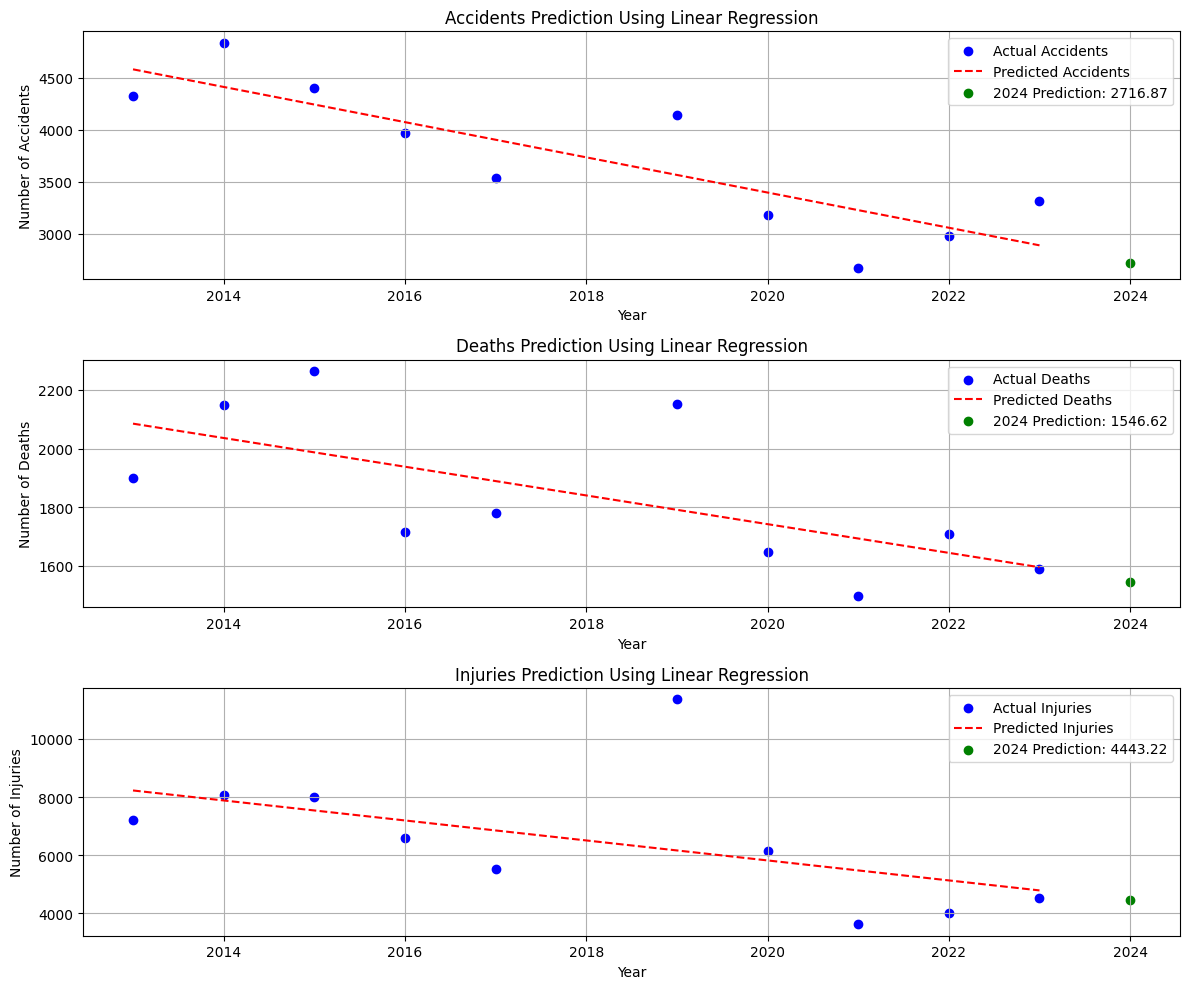

In [192]:
# Visualization
plt.figure(figsize=(12, 10))

# Plot Accidents
plt.subplot(3, 1, 1)
plt.scatter(df["Year"], y_accidents, color="blue", label="Actual Accidents")
plt.plot(df["Year"], pred_accidents, color="red", linestyle="--", label="Predicted Accidents")
plt.scatter(2024, future_accidents, color="green", label=f"2024 Prediction: {future_accidents:.2f}")
plt.title("Accidents Prediction Using Linear Regression")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.legend()
plt.grid(True)

# Plot Deaths
plt.subplot(3, 1, 2)
plt.scatter(df["Year"], y_deaths, color="blue", label="Actual Deaths")
plt.plot(df["Year"], pred_deaths, color="red", linestyle="--", label="Predicted Deaths")
plt.scatter(2024, future_deaths, color="green", label=f"2024 Prediction: {future_deaths:.2f}")
plt.title("Deaths Prediction Using Linear Regression")
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.legend()
plt.grid(True)

# Plot Injuries
plt.subplot(3, 1, 3)
plt.scatter(df["Year"], y_injuries, color="blue", label="Actual Injuries")
plt.plot(df["Year"], pred_injuries, color="red", linestyle="--", label="Predicted Injuries")
plt.scatter(2024, future_injuries, color="green", label=f"2024 Prediction: {future_injuries:.2f}")
plt.title("Injuries Prediction Using Linear Regression")
plt.xlabel("Year")
plt.ylabel("Number of Injuries")
plt.legend()
plt.grid(True)

# Show Plot
plt.tight_layout()
plt.show()

# Random Forest Regressor

In [193]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Train RandomForestRegressor for Accidents
random_forest_accidents = RandomForestRegressor(
    n_estimators=200, max_depth=10, random_state=42
).fit(X, y_accidents)
pred_accidents = random_forest_accidents.predict(X)
future_accidents = random_forest_accidents.predict(future_year)[0]

In [194]:
# Train RandomForestRegressor for Deaths
random_forest_deaths = RandomForestRegressor(
    n_estimators=200, max_depth=10, random_state=42
).fit(X, y_deaths)
pred_deaths = random_forest_deaths.predict(X)
future_deaths = random_forest_deaths.predict(future_year)[0]

In [195]:
# Train RandomForestRegressor for Injuries
random_forest_injuries = RandomForestRegressor(
    n_estimators=200, max_depth=10, random_state=42
).fit(X, y_injuries)
pred_injuries = random_forest_injuries.predict(X)
future_injuries = random_forest_injuries.predict(future_year)[0]

In [196]:
# Evaluate and Print Metrics
for label, y_true, y_pred, future_pred in [
    ("Accidents", y_accidents, pred_accidents, future_accidents),
    ("Deaths", y_deaths, pred_deaths, future_deaths),
    ("Injuries", y_injuries, pred_injuries, future_injuries),
]:
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{label} Metrics:")
    print(f"  MAE: {mae:.2f}")
    print(f"  R²: {r2:.2f}")
    print(f"  Predicted for 2024: {future_pred:.2f}\n")


Accidents Metrics:
  MAE: 147.25
  R²: 0.93
  Predicted for 2024: 3187.41

Deaths Metrics:
  MAE: 81.61
  R²: 0.86
  Predicted for 2024: 1624.75

Injuries Metrics:
  MAE: 516.25
  R²: 0.87
  Predicted for 2024: 4433.26



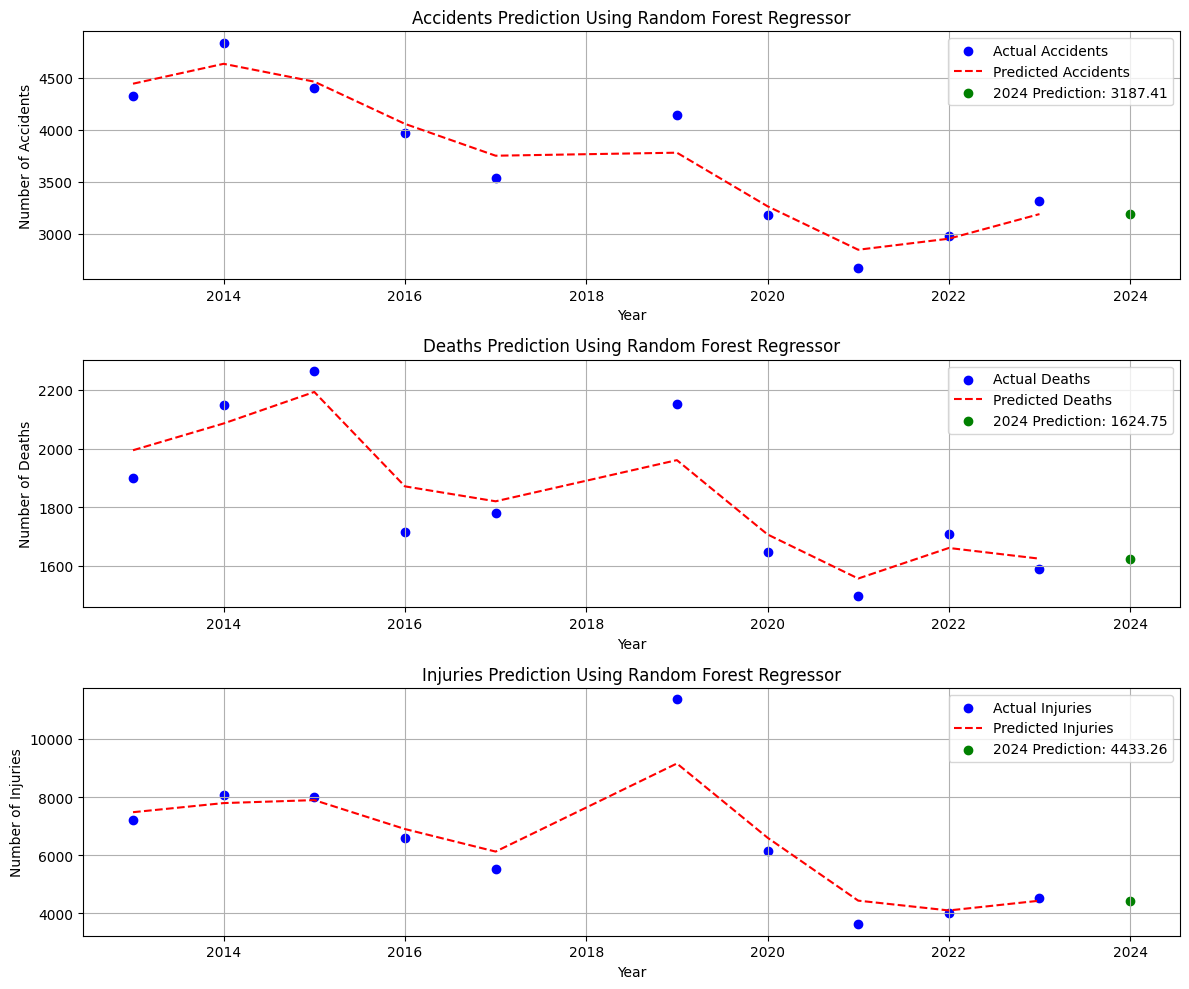

In [197]:
# Visualization
plt.figure(figsize=(12, 10))

# Plot Accidents
plt.subplot(3, 1, 1)
plt.scatter(df["Year"], y_accidents, color="blue", label="Actual Accidents")
plt.plot(df["Year"], pred_accidents, color="red", linestyle="--", label="Predicted Accidents")
plt.scatter(2024, future_accidents, color="green", label=f"2024 Prediction: {future_accidents:.2f}")
plt.title("Accidents Prediction Using Random Forest Regressor")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.legend()
plt.grid(True)

# Plot Deaths
plt.subplot(3, 1, 2)
plt.scatter(df["Year"], y_deaths, color="blue", label="Actual Deaths")
plt.plot(df["Year"], pred_deaths, color="red", linestyle="--", label="Predicted Deaths")
plt.scatter(2024, future_deaths, color="green", label=f"2024 Prediction: {future_deaths:.2f}")
plt.title("Deaths Prediction Using Random Forest Regressor")
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.legend()
plt.grid(True)

# Plot Injuries
plt.subplot(3, 1, 3)
plt.scatter(df["Year"], y_injuries, color="blue", label="Actual Injuries")
plt.plot(df["Year"], pred_injuries, color="red", linestyle="--", label="Predicted Injuries")
plt.scatter(2024, future_injuries, color="green", label=f"2024 Prediction: {future_injuries:.2f}")
plt.title("Injuries Prediction Using Random Forest Regressor")
plt.xlabel("Year")
plt.ylabel("Number of Injuries")
plt.legend()
plt.grid(True)

# Show Plot
plt.tight_layout()
plt.show()

# Support Vector Regression (SVR)

In [198]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
future_year_scaled = scaler.transform(future_year)


In [199]:
# Train SVR for Accidents
svr_accidents = SVR(kernel="rbf", C=1.0, epsilon=0.1).fit(X_scaled, y_accidents)
pred_accidents = svr_accidents.predict(X_scaled)
future_accidents = svr_accidents.predict(future_year_scaled)[0]


In [200]:
# Train SVR for Deaths
svr_deaths = SVR(kernel="rbf", C=1.0, epsilon=0.1).fit(X_scaled, y_deaths)
pred_deaths = svr_deaths.predict(X_scaled)
future_deaths = svr_deaths.predict(future_year_scaled)[0]

In [201]:
# Train SVR for Injuries
svr_injuries = SVR(kernel="rbf", C=1.0, epsilon=0.1).fit(X_scaled, y_injuries)
pred_injuries = svr_injuries.predict(X_scaled)
future_injuries = svr_injuries.predict(future_year_scaled)[0]

In [202]:
# Evaluate and Print Metrics
for label, y_true, y_pred, future_pred in [
    ("Accidents", y_accidents, pred_accidents, future_accidents),
    ("Deaths", y_deaths, pred_deaths, future_deaths),
    ("Injuries", y_injuries, pred_injuries, future_injuries),
]:
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{label} Metrics:")
    print(f"  MAE: {mae:.2f}")
    print(f"  R²: {r2:.2f}")
    print(f"  Predicted for 2024: {future_pred:.2f}\n")


Accidents Metrics:
  MAE: 598.42
  R²: 0.01
  Predicted for 2024: 3745.30

Deaths Metrics:
  MAE: 206.96
  R²: -0.13
  Predicted for 2024: 1744.65

Injuries Metrics:
  MAE: 1738.42
  R²: -0.00
  Predicted for 2024: 6371.81



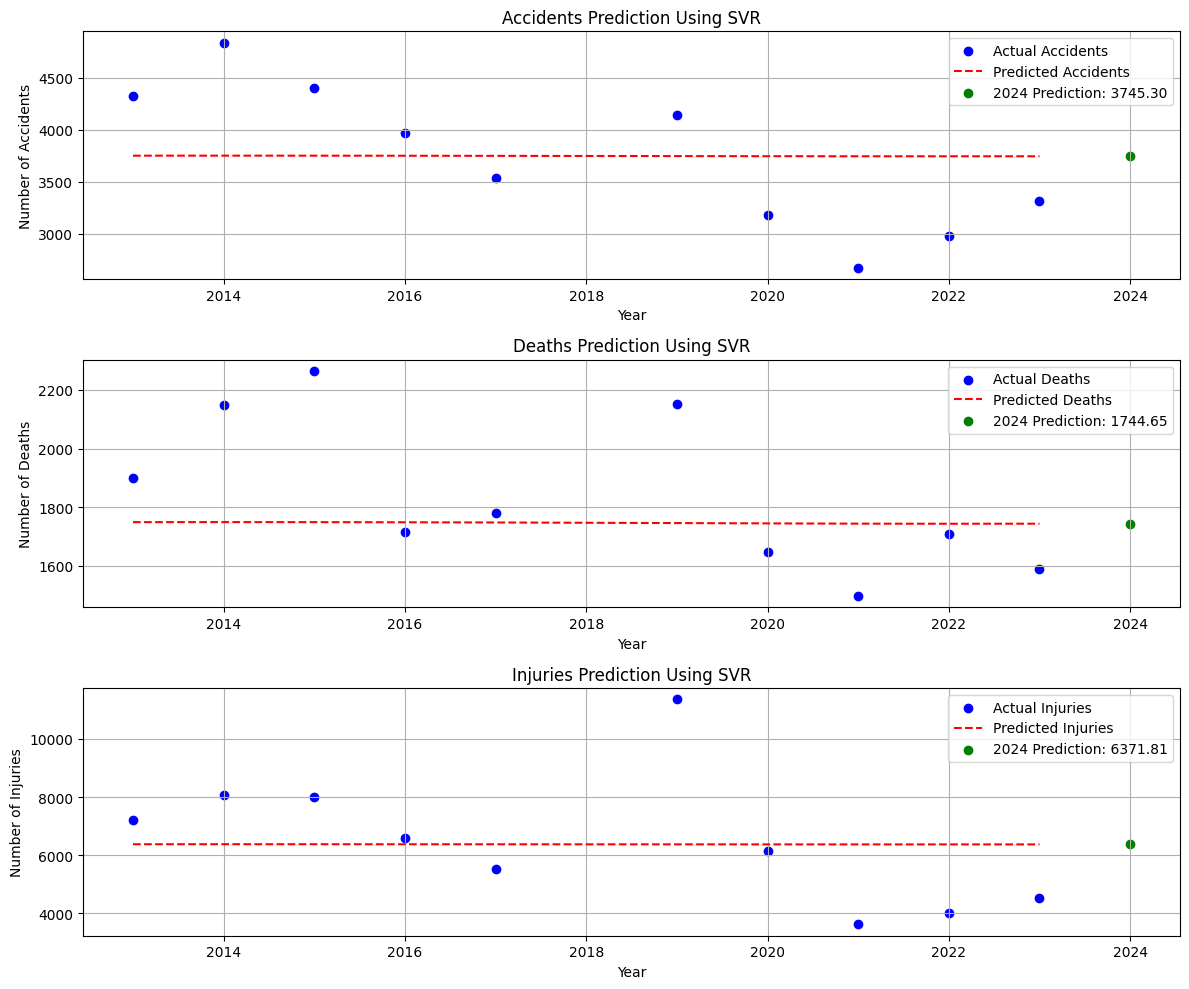

In [203]:
# Visualization
plt.figure(figsize=(12, 10))

# Plot Accidents
plt.subplot(3, 1, 1)
plt.scatter(df["Year"], y_accidents, color="blue", label="Actual Accidents")
plt.plot(df["Year"], pred_accidents, color="red", linestyle="--", label="Predicted Accidents")
plt.scatter(2024, future_accidents, color="green", label=f"2024 Prediction: {future_accidents:.2f}")
plt.title("Accidents Prediction Using SVR")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.legend()
plt.grid(True)

# Plot Deaths
plt.subplot(3, 1, 2)
plt.scatter(df["Year"], y_deaths, color="blue", label="Actual Deaths")
plt.plot(df["Year"], pred_deaths, color="red", linestyle="--", label="Predicted Deaths")
plt.scatter(2024, future_deaths, color="green", label=f"2024 Prediction: {future_deaths:.2f}")
plt.title("Deaths Prediction Using SVR")
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.legend()
plt.grid(True)

# Plot Injuries
plt.subplot(3, 1, 3)
plt.scatter(df["Year"], y_injuries, color="blue", label="Actual Injuries")
plt.plot(df["Year"], pred_injuries, color="red", linestyle="--", label="Predicted Injuries")
plt.scatter(2024, future_injuries, color="green", label=f"2024 Prediction: {future_injuries:.2f}")
plt.title("Injuries Prediction Using SVR")
plt.xlabel("Year")
plt.ylabel("Number of Injuries")
plt.legend()
plt.grid(True)

# Show Plot
plt.tight_layout()
plt.show()

In [205]:
# Decision Tree Predictions for 2024
dt_pred_accidents_2024 = linear_regression_accidents.predict(future_year)[0]
dt_pred_deaths_2024 = linear_regression_deaths.predict(future_year)[0]
dt_pred_injuries_2024 = linear_regression_injuries.predict(future_year)[0]

# Random Forest Predictions for 2024
rf_pred_accidents_2024 = random_forest_accidents.predict(future_year)[0]
rf_pred_deaths_2024 = random_forest_deaths.predict(future_year)[0]
rf_pred_injuries_2024 = random_forest_injuries.predict(future_year)[0]

# SVR Predictions for 2024
svr_pred_accidents_2024 = svr_accidents.predict(future_year_scaled)[0]
svr_pred_deaths_2024 = svr_deaths.predict(future_year_scaled)[0]
svr_pred_injuries_2024 = svr_injuries.predict(future_year_scaled)[0]

# Print Predictions
print("Predictions for 2024:")
print("Decision Tree:")
print(f"  Accidents: {dt_pred_accidents_2024:.2f}")
print(f"  Deaths: {dt_pred_deaths_2024:.2f}")
print(f"  Injuries: {dt_pred_injuries_2024:.2f}\n")

print("Random Forest:")
print(f"  Accidents: {rf_pred_accidents_2024:.2f}")
print(f"  Deaths: {rf_pred_deaths_2024:.2f}")
print(f"  Injuries: {rf_pred_injuries_2024:.2f}\n")

print("SVR:")
print(f"  Accidents: {svr_pred_accidents_2024:.2f}")
print(f"  Deaths: {svr_pred_deaths_2024:.2f}")
print(f"  Injuries: {svr_pred_injuries_2024:.2f}")

Predictions for 2024:
Decision Tree:
  Accidents: 2716.87
  Deaths: 1546.62
  Injuries: 4443.22

Random Forest:
  Accidents: 3187.41
  Deaths: 1624.75
  Injuries: 4433.26

SVR:
  Accidents: 3745.30
  Deaths: 1744.65
  Injuries: 6371.81
